In [26]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np

In [27]:
mean_planet_temp = [265, 255, 245, 235, 225, 215]
ice_lat = [75, 60, 45, 30, 15, 0]
planet_albedo = [0.15, 0.25, 0.35, 0.45, 0.55, 0.65]

In [28]:
il_slope, il_intercept = np.polyfit(mean_planet_temp, ice_lat, 1)
pa_slope, pa_intercept = np.polyfit(mean_planet_temp, planet_albedo, 1)

print(f'Ice lat slope: {il_slope},   Ice lat intercept: {il_intercept}')
print()
print(f'Planet albedo slope: {pa_slope},   Planet albedo intercept: {pa_intercept}')


Ice lat slope: 1.500000000000003,   Ice lat intercept: -322.50000000000057

Planet albedo slope: -0.010000000000000023,   Planet albedo intercept: 2.8000000000000043


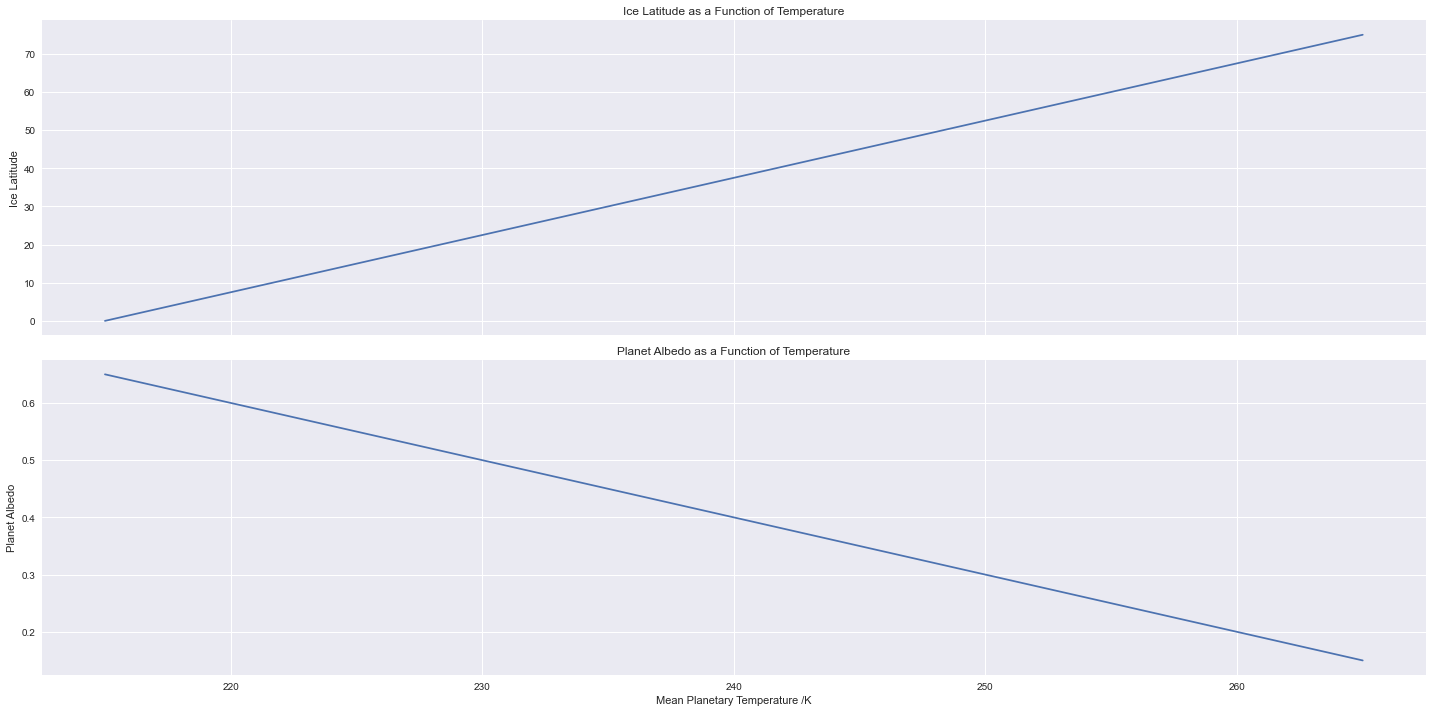

In [29]:
fig, ax = plt.subplots(2, figsize=(20, 10), sharex=True)

ax[0].plot(mean_planet_temp, ice_lat)
ax[0].set(title='Ice Latitude as a Function of Temperature', ylabel='Ice Latitude')

ax[1].plot(mean_planet_temp, planet_albedo)
ax[1].set(title='Planet Albedo as a Function of Temperature', ylabel='Planet Albedo', xlabel='Mean Planetary Temperature /K')

fig.tight_layout()
plt.show()


In [30]:
sigma = 5.67E-8 # W m^-2 K^-4
planet_albedo = 0.15
start_end = [ 1200, 1600 ] # Start & end values for solar radiation

sr_list = []
lat_list =[]
temp_list = []

L = start_end[1]

# Starting at a high solar radiation and reducing the value in incriments of 10
while L > start_end[0]-1:

    # Finding new values for albedo, then T, then albedo again, until the T and albedo values are consistent with each other.
    # This produces the most accurate estimate of ice lat & planet albedo for the given solar radiation value.    
    for i in range(0, 100):
        temp = L * (1-planet_albedo) / (4 * sigma)
        temp = temp**0.25

        ice_lat = il_slope * temp + il_intercept # estimating ice latitude from calcualted temperature.

        planet_albedo = pa_slope * temp + pa_intercept # estimating planet albedo from calcualted temperature.
        planet_albedo = min(planet_albedo, 0.65)
        planet_albedo = max(planet_albedo, 0.15)

    # appending ice latitude and temperature values for each solar radiation value
    sr_list.append(L)
    lat_list.append(ice_lat)
    temp_list.append(temp)

    L = L - 10

L = start_end[0]

# Repeating all the steps above but moving from low to high solar radiation values
while L < start_end[1]+1:
    for i in range(0, 100):
        temp = L * (1-planet_albedo) / (4 * sigma)
        temp = temp**0.25

        ice_lat = il_slope * temp + il_intercept

        planet_albedo = pa_slope * temp + pa_intercept
        planet_albedo = min(planet_albedo, 0.65)
        planet_albedo = max(planet_albedo, 0.15)        
        
    sr_list.append(L)
    lat_list.append(ice_lat)
    temp_list.append(temp)

    L = L + 10

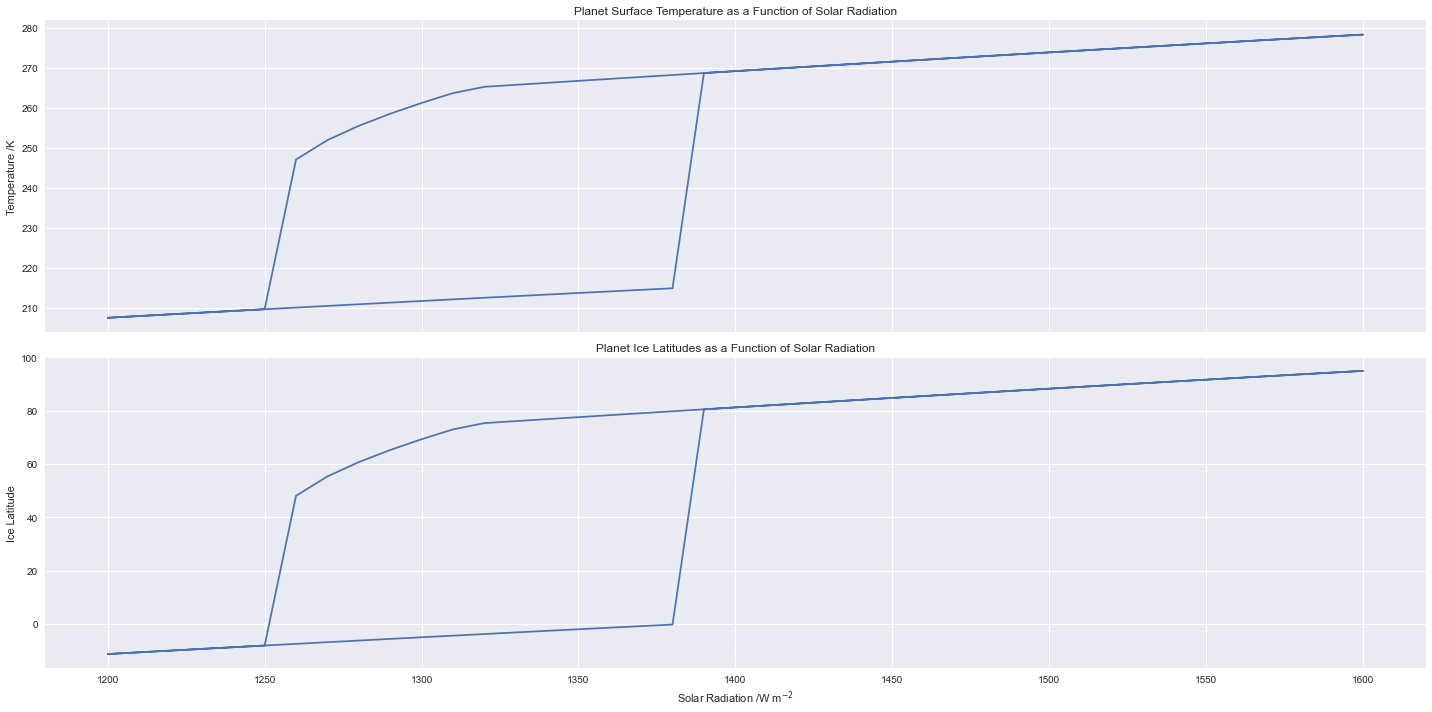

In [31]:
fig, ax = plt.subplots(2, figsize=(20, 10), sharex=True)

ax[0].plot(sr_list, temp_list)
ax[0].set(title='Planet Surface Temperature as a Function of Solar Radiation', ylabel='Temperature /K')

ax[1].plot(sr_list, lat_list)
ax[1].set(title='Planet Ice Latitudes as a Function of Solar Radiation', xlabel='Solar Radiation /W m$^{-2}$', ylabel='Ice Latitude')

fig.tight_layout()
plt.show()